# Visualização Numérica de dados em Python usando Numpy e Visualização gráfica com Matplotlib

## Parte 1 - visualização numérica

A biblioteca [Numpy](https://numpy.org/doc/1.18/) dispõe de poderosas funções para manipulação numérica e estatística. Ao longo do curso, iremos utilizar exaustivamente suas funcionalidades. As demais bibliotecas podem ser instaladas, após a ativação do ambiente, utilizando o comando `pip install`, no terminal linux. Ex.: `pip install numpy`

No [Google Colaboratory](https://colab.research.google.com/notebooks/) nao há necessidade de instalar a biblioteca Numpy.

In [1]:
import numpy as np

Iremos calcular a média de uma amostra segundo a formula:

$$
\overline{x} = \frac{1}{n} \sum_1^n {x_i}
$$

In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
media = sum(x)/ len(x)
print("Média:", media)

Média: 5.0


A biblioteca numpy possui método de cálculo de média amostral. Para tanto chamamos o método na forma `np.mean(x)`:

In [3]:
media = np.mean(x)
print("Média Amostral:",media)

Média Amostral: 5.0


## Trabalhando com funções em Python

Em python podemos transformar certas rotinas recorrentes em funções, veja o exemplo a seguir para cálculo da média:

In [4]:
def myMedia(vetor = [0]):
	mediaCalc = float(sum(vetor))/ float(len(vetor))
	return mediaCalc

# aqui o print já está fora da funçao devido à identação
print("Média:", myMedia(x))

Média: 5.0


### Exercício 1
Crie, no espaço de código a seguir, uma função myVariancia que retorne a variância de um vetor de dados $X$ segundo a expressão:

$$
VAR(X) = \frac{1}{n} \sum_1^n {{x_i}^2 - \texttt{myMedia}(X)^2}
$$

In [5]:
def myVariancia(vetor = [0]):
	varCalc = 0
	return varCalc
print("Variância:", myVariancia(x))

Variância: 0


Compare sua função com o método de cálculo de variância `np.var`

In [6]:
x = [1, 3, 5, 3, 2, 0, 1, 2, 6, 3, 4, 2, 1, 4, 6, 11, 9, 10, 18, 4]
print("Variância Numpy:",np.var(x))

Variância Numpy: 18.0875


## Quartis e Percentis

Para determinação de quartis podemos utilizar o método `np.quantile`. Os parâmetros são o veto $x$ contendo a amostra (não há necessidade de ordenar) e os intervalos para cálculo do quartil desejado. Usamos o vetor `[0.25,0.5,0.75]` para referenciar os quartis $q_1$ (25%), $q_2$ (mediana, 50%) e $q_3$ (75%).

In [7]:
x = [1, 3, 5, 3, 2, 0, 1, 2, 6, 3, 4, 2, 1, 4, 6, 11, 9, 10, 18, 4]
print("Amostra ordenada:",np.sort(x))
qNumpy = np.quantile(x,[0.25,0.5,0.75])
print("q1 =",qNumpy[0],"\tq2 =",qNumpy[1],"\tq3 =",qNumpy[2] )

Amostra ordenada: [ 0  1  1  1  2  2  2  3  3  3  4  4  4  5  6  6  9 10 11 18]
q1 = 2.0 	q2 = 3.5 	q3 = 6.0


Crie uma função no espaço de código a seguir para cálculo do quartil utilizando a expressão: 
$$
p = k \times \left(\frac{n+1}{4}\right) \rightarrow i + f
$$
$i$: parte inteira e $f$: parte fracionária; $k$ é o número do quartil desejado (1, 2 ou 3)

$$
q_k = x_i + f\times(x_{i+1} - x_{i})
$$

In [30]:
def myQuartil(arrayX=[0]):
	n = len(arrayX)
	k_choices = [1, 2, 3]
	p = [k * ((n + 1) / 4) for k in k_choices]
	print(p)

In [31]:
myQuartil([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

[3.0, 6.0, 9.0]


In [33]:
np.quantile([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0.25, 0.5, 0.75])

array([3.5, 6. , 8.5])

Compare sua função de cálculo de quartil com o método `np.quantile`. Há alguma diferença?

In [20]:
x = [1, 3, 5, 3, 2, 0, 1, 2, 6, 3, 4, 2, 1, 4, 6, 11, 9, 10, 18, 4]
qNumpy = np.quantile(x,[0.25,0.5,0.75])
print("Meu quartil:",myQuartil(x))
print("Quartil Numpy:",np.quantile(x,[0.25,0.5,0.75]))

Meu quartil: [5.25, 10.5, 15.75]
Quartil Numpy: [2.  3.5 6. ]


### Resumo dos principais métodos de descrição numérica:

- Tamanho da amostra: `len(input)`
- Média: `np.mean(input)`
- Variância: `np.var(input)`
- Mediana/ quartis `np.quantile(input,[0.25, 0.5, 0.75])`
- Amplitude: `np.amax(input) - np.amin(input)` (alternativamente: `max(x) - min(x)` )

## Parte 2: visualização gráfica

## Histograma

O histograma é um dos principais métodos de exibição gráfica de uma amostra. Com ele, podemos ter noção do comportamento de uma amostra, sua dispersão e, caso haja, o eixo de assimetria. Trata-se de um excelente primeiro método pra traçar hipóteses sobre uma amostra.

Podemos construir histogramas utilizando a biblioteca [`matplotlib`](https://matplotlib.org/contents.html):

In [34]:
import matplotlib.pyplot as plt

In [37]:
plt.rcParams.update({'font.size': 14})

Observe o exemplo a seguir para construção de histograma:

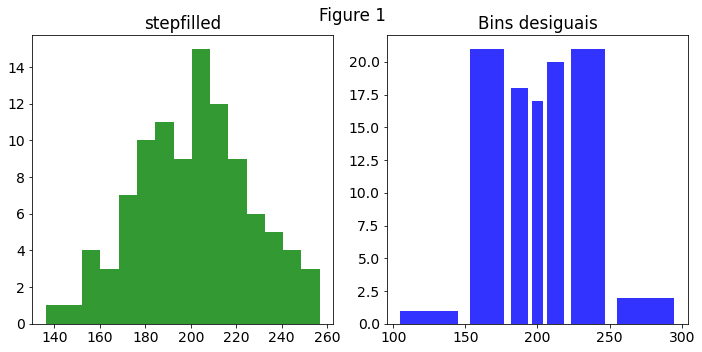

In [52]:
np.random.seed(0)

mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

plt.suptitle('Figure 1') # Título da figura como um todo
plt.subplots_adjust(wspace=0.75) # Ajustando o espaçamento horizontal

axs[0].hist(x, 15, histtype='stepfilled', facecolor='green', alpha=0.8)
axs[0].set_title('stepfilled')
# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
axs[1].hist(x, bins, histtype='bar', rwidth=0.8, facecolor='blue', alpha=0.8)
axs[1].set_title('Bins desiguais')

fig.tight_layout()
plt.show()

Veja a sintaxe completa na documentação do [histograma](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist). No código acima foram gerados 100 dados aleatórios utilizando o comando `np.random.normal(mu, sigma, size=100)` (posteriormente entraremos em detalhes sobre a geração de números aleatórios em python). Dessa vez, iremos criar um histograma a partir de um dado inserido manualmente.

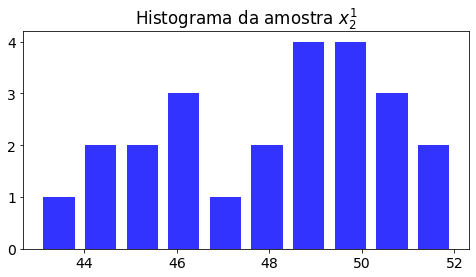

In [57]:
x = [43, 45, 49, 47, 52, 45, 51, 46, 44, 48, 51, 50, 52, 44, 48, 50, 49, 50, 46, 46, 49, 49, 51, 50]

fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
numBins = 10
ax.hist(x, numBins, histtype='bar', rwidth=.75, facecolor='blue', alpha=0.8)
ax.set_title('Histograma da amostra $x^1_2$')
plt.show()

É possível realizar anotações no gráfico usando os comandos `ax.text` e `ax.annotate`:

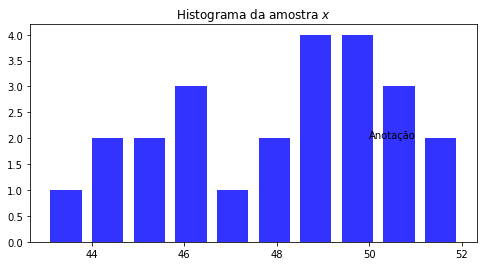

In [13]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
numBins = 10
ax.hist(x, numBins, histtype='bar', rwidth=.75, facecolor='blue', alpha=0.8)
ax.set_title('Histograma da amostra $x$')
ax.text(50, 2,'Anotação')
plt.show()

Para salvar a figura em formato .png use o comando savefig ou, no própro Jupyter, salve a figura gerada.

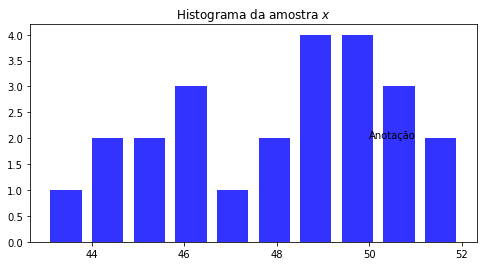

In [14]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
numBins = 10
ax.hist(x, numBins, histtype='bar', rwidth=.75, facecolor='blue', alpha=0.8)
ax.set_title('Histograma da amostra $x$')
ax.text(50, 2,'Anotação')

plt.savefig('foo.png', transparent=True)

Podemos inserir linhas para delimitar regiões ou valores de interesse em um histograma. Observe que o método `ax.get_ylim()[0]` recupera o valor mínimo do eixo  $y$ enquanto `ax.get_ylim()[1]` retorna seu valor máximo. Podemos utilizar esse recurso para inserir um texto na posição correta.

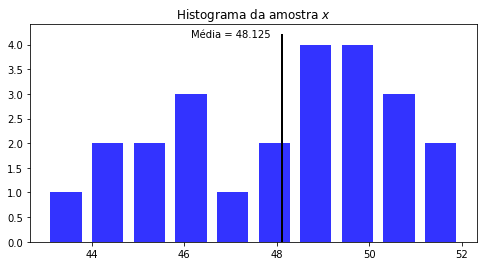

In [15]:
media = np.mean(x)

fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
numBins = 10
ax.hist(x, numBins, histtype='bar', rwidth=.75, facecolor='blue', alpha=0.8)
ax.get_ylim()[1]
ax.set_title('Histograma da amostra $x$')
plt.plot([media, media], [ax.get_ylim()[0], ax.get_ylim()[1]], 'k-', lw=2)
ax.text(media - 0.25, ax.get_ylim()[1] - 0.25,'Média = {}'.format(media),horizontalalignment='right')
plt.show()